# Classification and Regression Tree (CART)

### Here Explored Only Classification
 - It  can handle both classification and regression task
 - This algorithm uses a new metrics named gini index to create decision points for classification task
 
$Gini ~Index = 1 - \sum_{i = 1}^c (P_i)^2 \quad $ c is equal to number of classes and $P_i$ is probability of classes

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('../SDataset/play_or_not.csv')
orig_df = df.copy(deep = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       14 non-null     int64 
 1   Outlook   14 non-null     object
 2   Temp      14 non-null     object
 3   Humidity  14 non-null     object
 4   Wind      14 non-null     object
 5   Decision  14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [3]:
df.shape

(14, 6)

In [4]:
df

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
objlist = df.select_dtypes(include = 'object')
objlist

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [7]:
le = LabelEncoder()
for ob in objlist:
    df[ob] = le.fit_transform(df[ob])
df

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,2,1,0,1,0
1,2,2,1,0,0,0
2,3,0,1,0,1,1
3,4,1,2,0,1,1
4,5,1,0,1,1,1
5,6,1,0,1,0,0
6,7,0,0,1,0,1
7,8,2,2,0,1,0
8,9,2,0,1,1,1
9,10,1,2,1,1,1


In [8]:
df.columns

Index(['Day', 'Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'], dtype='object')

## *Example Ilustrated below do not consider for random sample, it take whole data and peform decision on it

# First level

In [9]:
orig_df

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [10]:
#outlook 
print("gini(0):", 1- (0/4)**2-(4/4)**2) #check level 2 blue box gini = 0 for Outlook's overcast leaf havin only Yes Decision
print("ginit(1):", 1 - (2/5)**2-(3/5)**2)
print("gini(2):", 1 - (3/5)**2 - (2/3)**2)
print("Weighted gini:", (4/14)*0.0 + (5/14)*0.48 + (5/14)*0.196)
pd.crosstab(df.Outlook, df.Decision)

gini(0): 0.0
ginit(1): 0.48
gini(2): 0.1955555555555556
Weighted gini: 0.24142857142857144


Decision,0,1
Outlook,,
0,0,4
1,2,3
2,3,2


In [11]:
#Temp 
print("gini(0):", 1- (1/4)**2-(3/4)**2)
print("ginit(1):", 1 - (2/4)**2-(2/4)**2)
print("gini(2):", 1 - (2/6)**2 - (4/6)**2)
print("Weighted gini:", (4/14)*0.375 + (4/14)*0.5 + (6/14)*0.4444)
pd.crosstab(df.Temp, df.Decision)

gini(0): 0.375
ginit(1): 0.5
gini(2): 0.4444444444444444
Weighted gini: 0.4404571428571429


Decision,0,1
Temp,,
0,1,3
1,2,2
2,2,4


In [12]:
#Humidity 
print("gini(0):", 1- (4/7)**2-(3/7)**2)
print("ginit(1):", 1 - (1/7)**2-(6/7)**2)
print("Weighted gini:", (7/14)*0.48979591836734704 + (7/14)*0.24489795918367352)
pd.crosstab(df.Humidity, df.Decision)

gini(0): 0.48979591836734704
ginit(1): 0.24489795918367352
Weighted gini: 0.3673469387755103


Decision,0,1
Humidity,,
0,4,3
1,1,6


In [13]:
#Wind
print("gini(0):", 1- (3/6)**2-(3/6)**2)
print("ginit(1):", 1 - (2/8)**2-(6/8)**2)
print("Weighted gini:", (4/14)*0.5 + (5/14)*0.375)
pd.crosstab(df.Wind, df.Decision)

gini(0): 0.5
ginit(1): 0.375
Weighted gini: 0.2767857142857143


Decision,0,1
Wind,,
0,3,3
1,2,6


#### Lowest gini index is chosen, here chosen attribute is Outlook with gini = 0.24142857142857144

Observe Carefully that Outlook attribute for class overcast has only Yes decision, which means overcast leaf is over

# Second Level

# Second Level (Outlook= Sunny)

In [14]:
orig_df[orig_df['Outlook'] == 'Sunny']

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
10,11,Sunny,Mild,Normal,Strong,Yes


In [15]:
a = orig_df[orig_df['Outlook'] == 'Sunny']
#Now total number of instances changes to 5

In [16]:
#(Outlook = Sunny, Temp)
print("gini(Outlook = Sunny and Temp = Cool):", 1 - (0/1)**2 -(1/1)**2)
print("gini(Outlook = Sunny and Hot = Cool):", 1 - (2/2)**2 -(0/2)**2)
print("gini(Outlook = Sunny and Temp = Cool):", 1 - (1/2)**2 -(1/2)**2)
print("Weighted gini(Outllook = Sunny and Temp):", (2/5)*0 + (1/5)*0 + (2/5)*0.5)
pd.crosstab(a.Temp, orig_df.Decision)

gini(Outlook = Sunny and Temp = Cool): 0.0
gini(Outlook = Sunny and Hot = Cool): 0.0
gini(Outlook = Sunny and Temp = Cool): 0.5
Weighted gini(Outllook = Sunny and Temp): 0.2


Decision,No,Yes
Temp,,
Cool,0,1
Hot,2,0
Mild,1,1


In [17]:
#(Outlook = Sunny, Humidity)
print("gini(Outlook = Sunny and Humidity = High):", 1 - (3/3)**2 -(0/3)**2)
print("gini(Outlook = Sunny and Humidity = Normal):", 1 - (2/2)**2 -(0/2)**2)
print("Weighted gini(Outllook = Sunny and Temp):", (3/5)*0.0 + (1/5)*0.0)
pd.crosstab(a.Humidity, orig_df.Decision)

gini(Outlook = Sunny and Humidity = High): 0.0
gini(Outlook = Sunny and Humidity = Normal): 0.0
Weighted gini(Outllook = Sunny and Temp): 0.0


Decision,No,Yes
Humidity,,
High,3,0
Normal,0,2


In [18]:
#(Outlook = Sunny, Wind )
print("gini(Outlook = Sunny and Wind = Strong):", 1 - (1/2)**2 -(1/2)**2)
print("gini(Outlook = Sunny and Wind = Weak):", 1 - (2/3)**2 -(1/3)**2)
print("Weighted gini(Outllook = Sunny and Wind):", (2/5)*0.5 + (3/5)*0.44444)
pd.crosstab(a.Wind, orig_df.Decision)

gini(Outlook = Sunny and Wind = Strong): 0.5
gini(Outlook = Sunny and Wind = Weak): 0.4444444444444445
Weighted gini(Outllook = Sunny and Wind): 0.466664


Decision,No,Yes
Wind,,
Strong,1,1
Weak,2,1


#### At this level Gini index of Humidity is lowest which is 0
two points to consider from here
 - Decision is always "No" for Outlook's Sunny class and Humidity's High class
 - Dicision is always "Yes" for Outlook's Sunny class and Humidity's Normal class

# Second Level (Outlook = Rain)

In [19]:
orig_df[orig_df['Outlook'] == 'Rain']

,Day,Outlook,Temp,Humidity,Wind,Decision
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
9,10,Rain,Mild,Normal,Weak,Yes
13,14,Rain,Mild,High,Strong,No


In [20]:
a = orig_df[orig_df['Outlook'] == 'Rain']
# number of example  are 5 now

In [21]:
#(Outlook = Rain, Temperature)
print("gini(Outlook = Rain and Temp = Cool):", 1 - (1/2)**2 -(1/2)**2)
print("gini(Outlook = Rain and Temp = Mild):", 1 - (1/3)**2 -(2/3)**2)
print("Weighted gini(Outllook = Sunny and Rain):", (2/5)*0.5 + (3/5)*0.4444444444)
pd.crosstab(a.Temp, orig_df.Decision)

gini(Outlook = Rain and Temp = Cool): 0.5
gini(Outlook = Rain and Temp = Mild): 0.4444444444444444
Weighted gini(Outllook = Sunny and Rain): 0.46666666664


Decision,No,Yes
Temp,,
Cool,1,1
Mild,1,2


In [22]:
#(Outlook = Rain, Humidity)
print("gini(Outlook = Rain and Humidity = High ):", 1 - (1/2)**2 -(1/2)**2)
print("gini(Outlook = Rain and Humidity = Normal):", 1 - (1/3)**2 -(2/3)**2)
print("Weighted gini(Outllook = Sunny and Humidity):", (2/5)*0.5 + (3/5)*0.4444444444)
pd.crosstab(a.Humidity, orig_df.Decision)

gini(Outlook = Rain and Humidity = High ): 0.5
gini(Outlook = Rain and Humidity = Normal): 0.4444444444444444
Weighted gini(Outllook = Sunny and Humidity): 0.46666666664


Decision,No,Yes
Humidity,,
High,1,1
Normal,1,2


In [23]:
#(Outlook = Rain, Wind)
print("gini(Outlook = Rain and Wind = High ):", 1 - (2/2)**2 -(0/2)**2)
print("gini(Outlook = Rain and Wind = Weak):", 1 - (0/3)**2 -(3/3)**2)
print("Weighted gini(Outllook = Sunny and Wind):", (2/5)*0.0 + (3/5)*0.0)
pd.crosstab(a.Wind, orig_df.Decision)

gini(Outlook = Rain and Wind = High ): 0.0
gini(Outlook = Rain and Wind = Weak): 0.0
Weighted gini(Outllook = Sunny and Wind): 0.0


Decision,No,Yes
Wind,,
Strong,2,0
Weak,0,3


#### At this level Gini index of Wind is lowest which is 0
 - Observe decision is always "Yes" for Winds's Weak and "No" for vice-versa

#### This is how tree will looks like

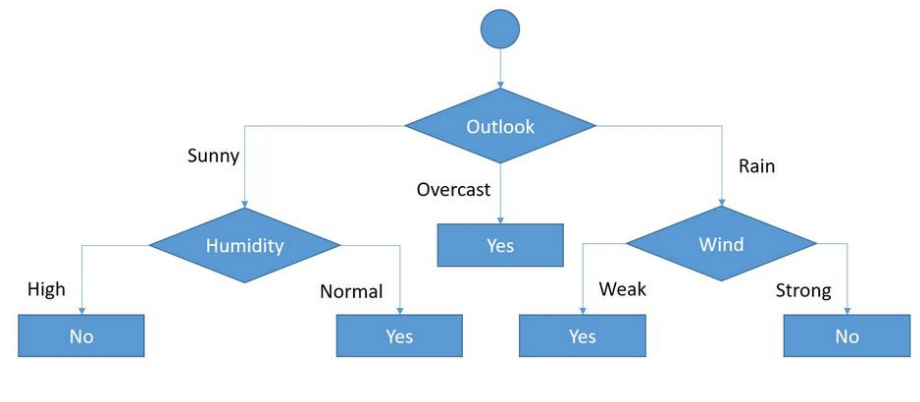

In [24]:
Image('../SDataset/CART.png')

### *Consider for Random data sampled from dataset
with splitter = best

[]

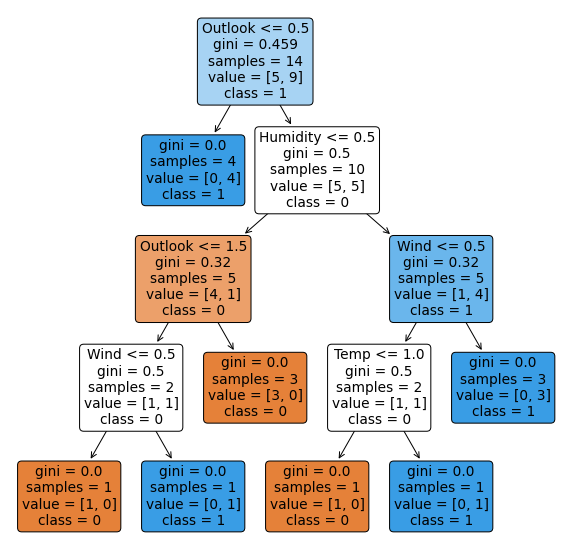

In [25]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best')
clf.fit(df.iloc[:, 1:5], df.Decision)
plt.figure(figsize = (10, 10))
tree.plot_tree(clf, feature_names=['Outlook', 'Temp', 'Humidity', 'Wind'], class_names= ['0', '1'], rounded=True, filled=True )
plt.plot()

In [26]:
#just splitting data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 1:5], df.Decision, random_state = 42, test_size = .20)
X_train.shape, X_test.shape,Y_train.shape,  Y_test.shape

((11, 4), (3, 4), (11,), (3,))

In [28]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [29]:
pred = clf.predict(X_test)

In [30]:
print('Accuracy:',accuracy_score(Y_test, pred)*100)

Accuracy: 100.0


In [31]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

